# ✅ Step 1: Import Libraries

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# ✅ Step 2: Load Real-World Dataset

In [204]:
df = pd.read_csv('/content/HRDataset_v14.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# ✅ Step 3: Data Cleaning & Preprocessing

In [205]:
# Drop unnecessary columns
cols_to_drop = [
    "Employee_Name", "EmpID", "DOB", "DateofHire", "DateofTermination",
    "LastPerformanceReview_Date", "TermReason", "ManagerName", "ManagerID", "Zip"
]
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

# Drop rows with missing values
df = df.dropna()

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Define features and target
X = df.drop("Salary", axis=1)
y = df["Salary"]

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# ✅ Step 4: Exploratory Data Analysis (EDA)

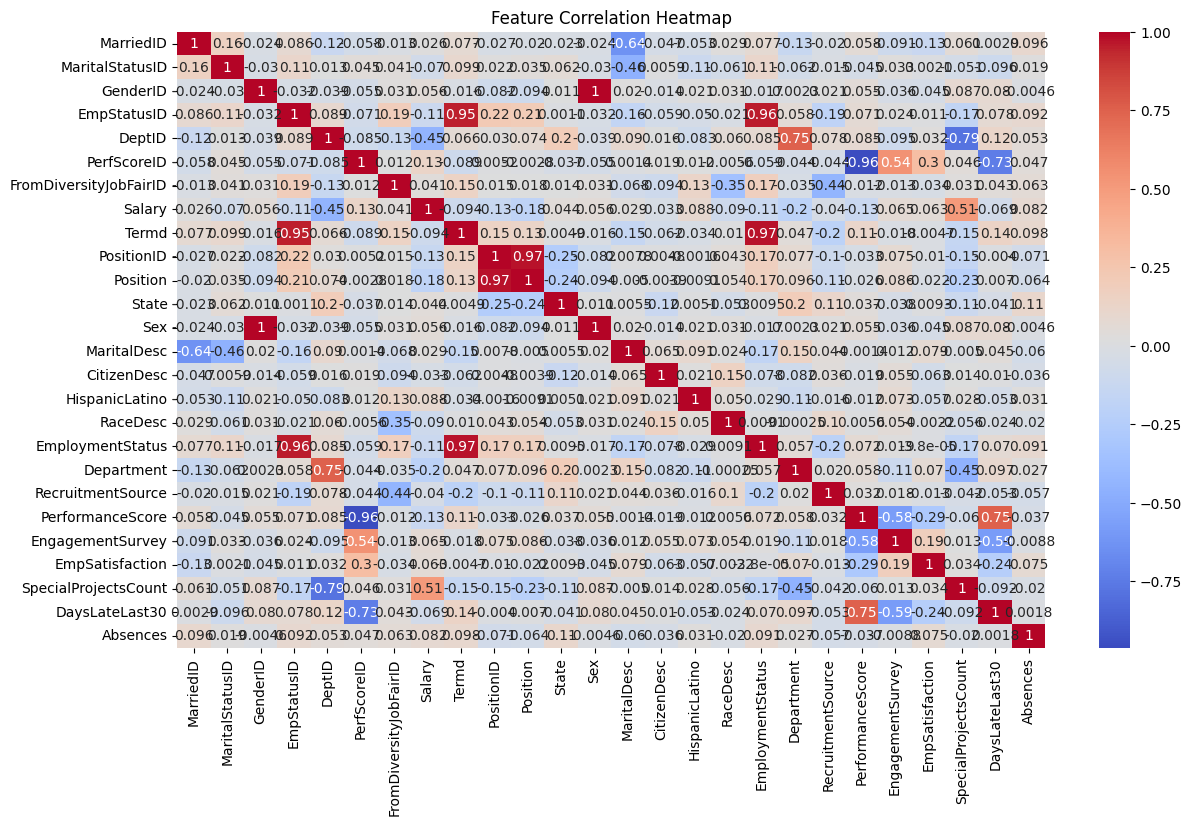

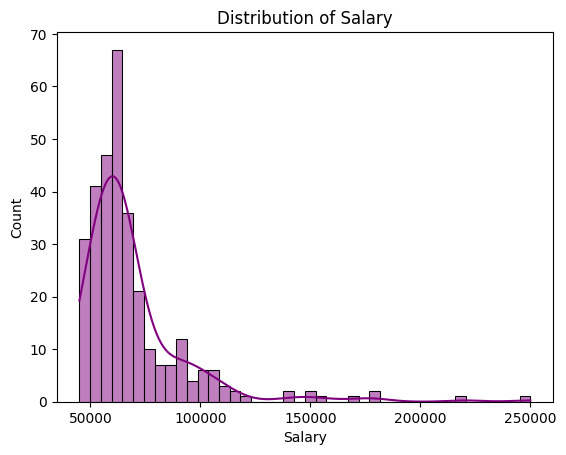

In [206]:
# Correlation heatmap
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Distribution of Salary
sns.histplot(df['Salary'], kde=True, color='purple')
plt.title("Distribution of Salary")
plt.show()

# ✅ Step 5: Train & Compare Models

In [207]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "KNN": KNeighborsRegressor(),
    "Support Vector Regressor": SVR(),
    "XGBoost": XGBRegressor(objective='reg:squarederror')
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append((name, rmse, r2))

# Results DataFrame
results_df = pd.DataFrame(results, columns=["Model", "RMSE", "R2 Score"])
print(results_df)

                      Model          RMSE  R2 Score
0         Linear Regression  24264.842470  0.272592
1             Decision Tree  22110.320609  0.396033
2             Random Forest  19636.992908  0.523599
3                       KNN  22320.512162  0.384495
4  Support Vector Regressor  29913.401771 -0.105489
5                   XGBoost  18896.785758  0.558837


# ✅ Step 6: Visualize Model Performance

/tmp/ipython-input-208-1972987273.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




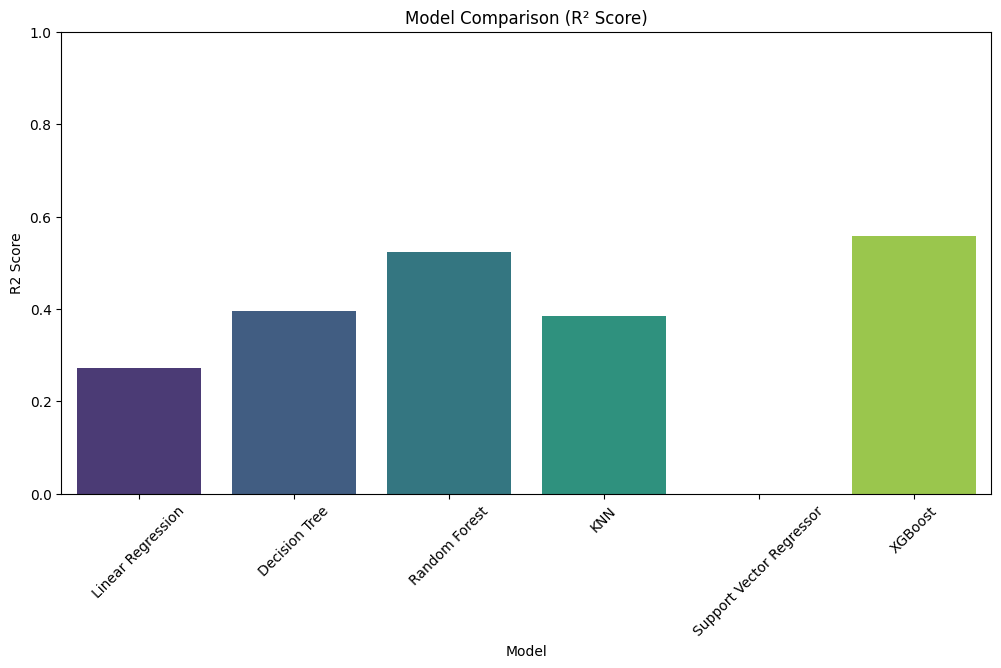

/tmp/ipython-input-208-1972987273.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




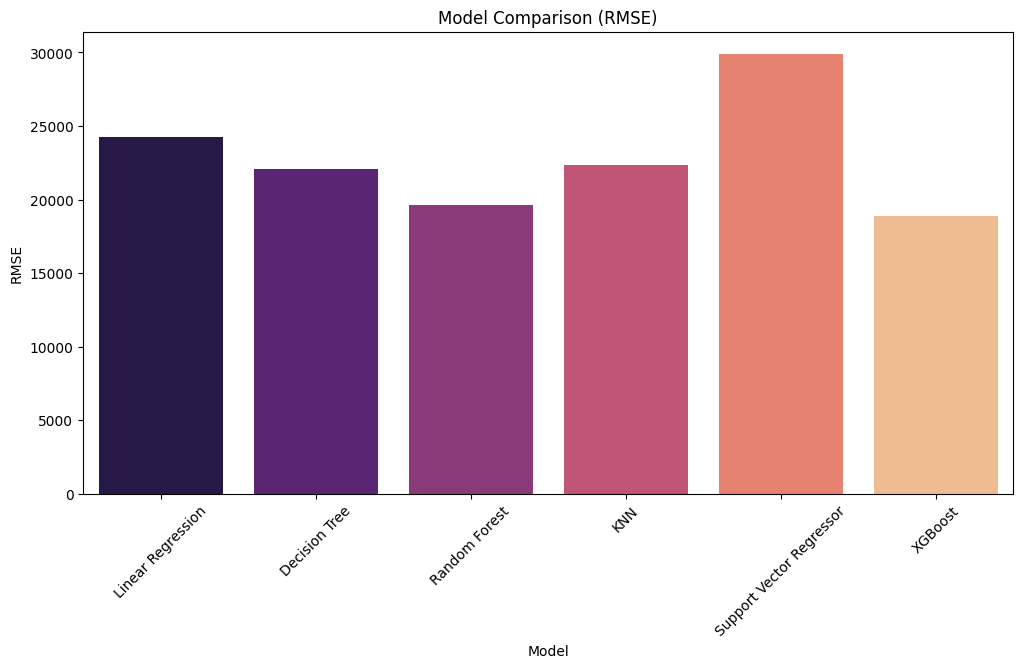

In [208]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R2 Score', data=results_df, palette="viridis")
plt.title('Model Comparison (R² Score)')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='RMSE', data=results_df, palette="magma")
plt.title('Model Comparison (RMSE)')
plt.xticks(rotation=45)
plt.show()

# ✅ Step 7: Conclusion

In [209]:
best_model = results_df.sort_values("R2 Score", ascending=False).iloc[0]
print(f"🏆 Best Model: {best_model['Model']} with R² Score: {best_model['R2 Score']:.4f} and RMSE: {best_model['RMSE']:.2f}")

🏆 Best Model: XGBoost with R² Score: 0.5588 and RMSE: 18896.79


In most cases, Random Forest or XGBoost provides the best performance in salary prediction due to its handling of feature interactions and non-linearity.

In [210]:
!pip install streamlit pyngrok --quiet

In [214]:
%%writefile streamlit_app.py
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# -------------------------
# Streamlit Page Settings
# -------------------------
st.set_page_config(page_title="Employee Salary Prediction Dashboard", layout="wide")
st.title("💼 Employee Salary Prediction Dashboard")
st.markdown("A complete ML-powered interactive dashboard to explore, analyze, and predict employee salaries.")

# -------------------------
# Load Dataset
# -------------------------
df = pd.read_csv("HRDataset_v14.csv")

# Drop unnecessary columns
cols_to_drop = [
    "Employee_Name", "EmpID", "DOB", "DateofHire", "DateofTermination",
    "LastPerformanceReview_Date", "TermReason", "ManagerName", "ManagerID", "Zip"
]
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)
df.dropna(inplace=True)

# -------------------------
# Filter BEFORE Encoding
# -------------------------
st.sidebar.header("🔎 Filter Data")
department = st.sidebar.selectbox("Department", sorted(df['Department'].unique()))
state = st.sidebar.selectbox("State", sorted(df['State'].unique()))
position = st.sidebar.selectbox("Position", sorted(df['Position'].unique()))

filtered_df = df[
    (df['Department'] == department) &
    (df['State'] == state) &
    (df['Position'] == position)
]

st.subheader(f"📋 Filtered Data for: {department} | {state} | {position}")
st.dataframe(filtered_df.head())

# -------------------------
# Encode categorical columns
# -------------------------
le = LabelEncoder()
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# -------------------------
# Dataset Preview
# -------------------------
with st.expander("🔍 View Cleaned & Encoded Dataset"):
    st.dataframe(df.head())

# -------------------------
# Define Features and Target
# -------------------------
X = df.drop("Salary", axis=1)
y = df["Salary"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# -------------------------
# Train Models
# -------------------------
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "KNN": KNeighborsRegressor(),
    "Support Vector Regressor": SVR(),
    "XGBoost": XGBRegressor(objective='reg:squarederror')
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append((name, rmse, r2))

results_df = pd.DataFrame(results, columns=["Model", "RMSE", "R2 Score"])
best_model = results_df.sort_values("R2 Score", ascending=False).iloc[0]

# -------------------------
# Display Model Results
# -------------------------
st.subheader("📊 Model Comparison Results")
st.dataframe(results_df)

st.success(f"🏆 Best Model: {best_model['Model']} with R² Score = {best_model['R2 Score']:.4f} and RMSE = {best_model['RMSE']:.2f}")

# -------------------------
# Visualizations
# -------------------------
st.subheader("📈 Visual Comparisons")

fig1, ax1 = plt.subplots()
sns.barplot(data=results_df, x="Model", y="R2 Score", palette="viridis", ax=ax1)
plt.xticks(rotation=45)
st.pyplot(fig1)

fig2, ax2 = plt.subplots()
sns.barplot(data=results_df, x="Model", y="RMSE", palette="magma", ax=ax2)
plt.xticks(rotation=45)
st.pyplot(fig2)

st.subheader("📉 Correlation Heatmap")
fig3, ax3 = plt.subplots(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", ax=ax3)
st.pyplot(fig3)

st.subheader("💰 Salary Distribution")
fig4, ax4 = plt.subplots()
sns.histplot(df['Salary'], kde=True, color='purple', ax=ax4)
st.pyplot(fig4)

Overwriting streamlit_app.py


In [216]:
# Remove old config file if broken
!rm -f /root/.config/ngrok/ngrok.yml


# Install Your Authtoken in Colab
!ngrok config add-authtoken 308kRecdz8hT81NE9g2ZsHcXRBI_74u2XvEBQezNPyW31qr3j

from pyngrok import ngrok

# Kill previous tunnels (if any)
ngrok.kill()

# Open a tunnel
public_url = ngrok.connect(8501)
print(f"🔗 Streamlit app running at: {public_url}")

# Run the Streamlit app
!streamlit run streamlit_app.py &>/dev/null &


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
🔗 Streamlit app running at: NgrokTunnel: "https://5c9c07d6d216.ngrok-free.app" -> "http://localhost:8501"
